# Semi-supervised algorithm
## 전체 데이터에서 아주 낮은 비율의 labeling이 있는 자료를 지도학습하여 비지도학습을 하는 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from IPython.display import Image
width=800; height=500

In [3]:
pwd

'd:\\2021_개발분석가교육\\scripts'

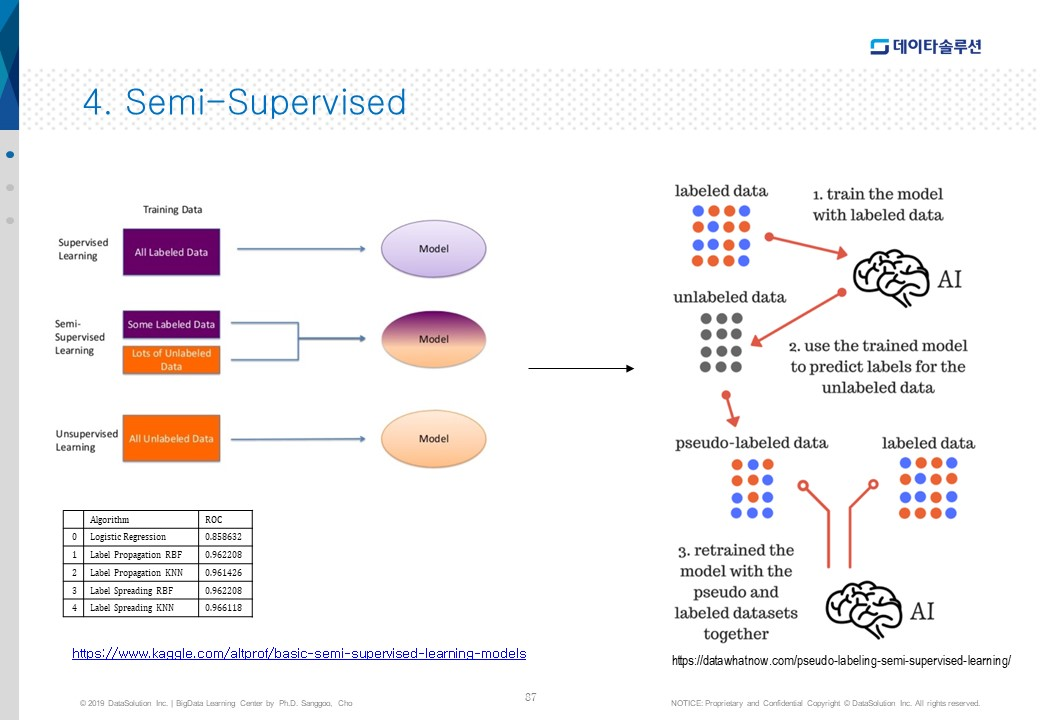

In [4]:
Image('../img/슬라이드87.jpg', width=width, height=height)

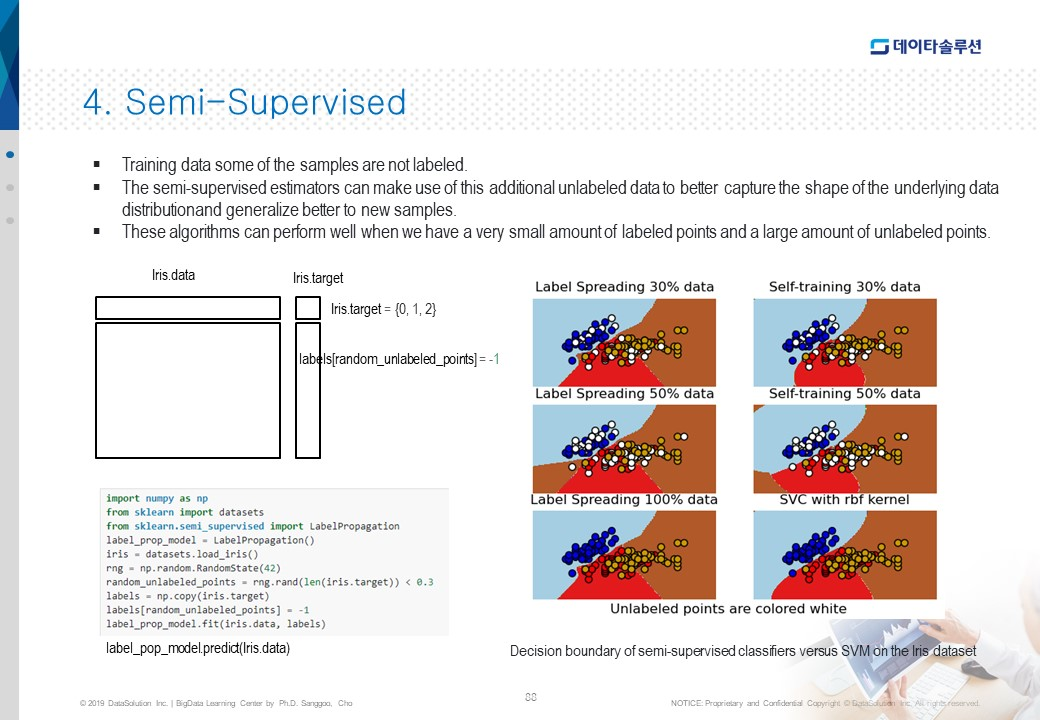

In [5]:
Image('../img/슬라이드88.jpg', width=width, height=height)

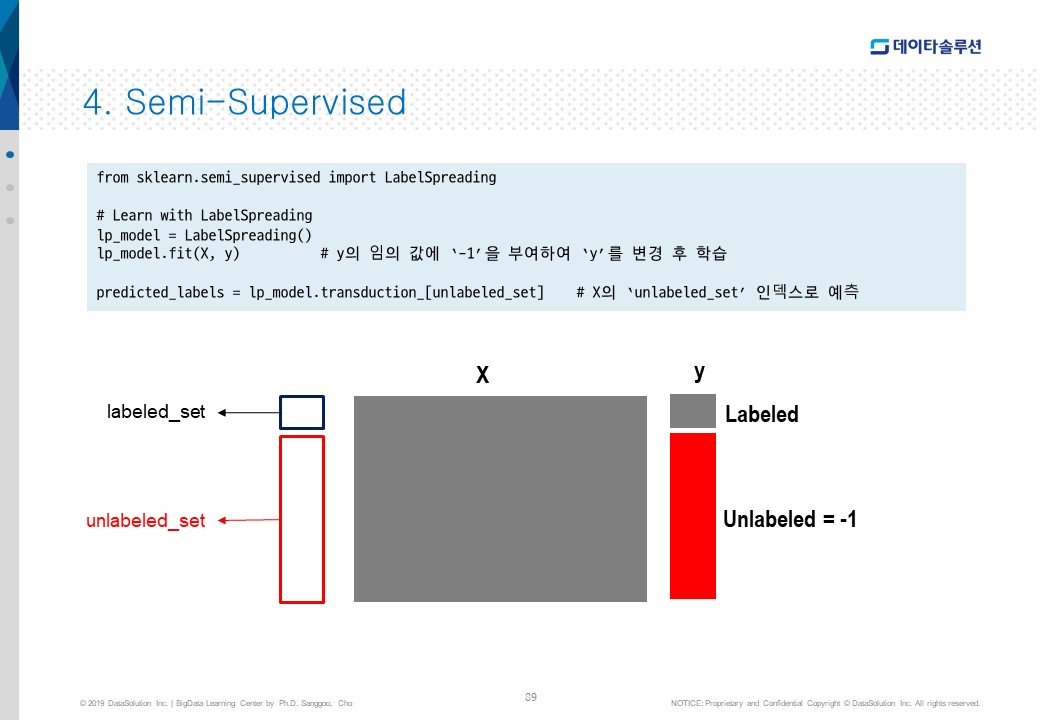

In [6]:
Image('../img/슬라이드89.jpg', width=width, height=height)

## 데이터 생성

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


무작위 난수를 발생시켜 0.3미만인 index에 해당되는 'target'를 '-1'로 변환

In [8]:
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
df.loc[random_unlabeled_points, 'target'] = -1
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
82,5.8,2.7,3.9,1.2,1
65,6.7,3.1,4.4,1.4,1
111,6.4,2.7,5.3,1.9,-1
56,6.3,3.3,4.7,1.6,-1
118,7.7,2.6,6.9,2.3,2


# 1. LabelSpreading
This model is similar to the basic Label Propagation algorithm, but uses affinity matrix based on the normalized graph Laplacian and soft clamping across the labels.

In [9]:
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()
label_prop_model.fit(df.drop('target', axis=1), df['target'])

LabelPropagation()

### 예측 데이터의 정확도(accuracy)

In [10]:
y_predict = label_prop_model.predict(df.drop('target', axis=1))
np.sum(y_predict == df['target']) / df.shape[0]

0.66

#### 데이터를 numpy로 

In [11]:
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)
y_predict = label_prop_model.predict(iris.data)
np.sum(y_predict == df['target']) / len(y_predict)

LabelPropagation()

0.66

# 2. LabelSpreading
This model is similar to the basic Label Propagation algorithm, but uses affinity matrix based on the normalized graph Laplacian and soft clamping across the labels.

In [12]:
from sklearn.semi_supervised import LabelSpreading
label_spre_model = LabelSpreading()
label_spre_model.fit(df.drop('target', axis=1), df['target'])

LabelSpreading()

### 예측 데이터의 정확도(accuracy)

In [13]:
y_predict = label_spre_model.predict(df.drop('target', axis=1))
np.sum(y_predict == df['target']) / df.shape[0]

0.66

## 3. 예제 (Label Propagation digits: Demonstrating performance)
This example demonstrates the power of semisupervised learning by training a Label Spreading model to classify handwritten digits with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will be trained using all points, but only 30 will be labeled. Results in the form of a confusion matrix and a series of metrics over each class will be very good.

At the end, the top 10 most uncertain predictions will be shown.

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
indices

array([   0,    1,    2, ..., 1794, 1795, 1796])

인덱스를 무작위 shuffle

In [15]:
rng.shuffle(indices)
indices

array([ 154,  564, 1444, ...,  493,  527, 1192])

In [16]:
digits.keys()
digits.data.shape
digits.data
digits.target

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
digits.images.shape
digits.images[0:2]

(1797, 8, 8)

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [18]:
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

무작위 shuffling한 인덱스에 label 자료는 40개, unlabel 자료는 300개 생성

In [19]:
n_total_samples = len(y); n_total_samples 
n_labeled_points = 40 

340

In [20]:
indices = np.arange(n_total_samples)
unlabeled_set = indices[n_labeled_points:]

In [21]:
# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1
y_train
# #############################################################################

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

예측이라기 보다는 transduction
  * lp_model.transduction_[unlabeled_set] 와 lp_model.predict(X[[unlabeled_set]]) same syntax

In [22]:
# Learn with LabelSpreading
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]  # lp_model.predict(X[[unlabeled_set]])
predicted_labels.shape
predicted_labels

LabelSpreading(gamma=0.25, max_iter=20)

(300,)

array([8, 1, 5, 7, 5, 5, 9, 6, 1, 5, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8,
       5, 4, 4, 4, 7, 5, 1, 4, 3, 1, 3, 1, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3,
       1, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 1, 2, 2, 6, 4, 6, 7,
       3, 7, 3, 9, 4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 5, 2, 0, 8, 1, 9,
       2, 1, 9, 1, 0, 3, 4, 5, 0, 4, 3, 2, 2, 5, 3, 1, 6, 7, 6, 8, 3, 1,
       1, 6, 4, 8, 2, 1, 1, 4, 1, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7,
       6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 5, 2, 0, 5, 2, 7, 3,
       0, 2, 1, 5, 2, 7, 0, 6, 9, 9, 1, 1, 3, 5, 2, 5, 5, 2, 1, 1, 9, 4,
       6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 5, 2, 7, 5, 5, 4,
       8, 6, 6, 2, 8, 7, 3, 7, 6, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4,
       1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 9, 5, 5, 4,
       0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 7, 7, 2,
       1, 0, 8, 6, 9, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8,
       0, 6, 6, 7, 1, 4, 5, 6, 9, 5, 2, 8, 9, 1])

In [23]:
lp_model.predict(X[[unlabeled_set]])[0:22]

array([8, 1, 5, 7, 5, 5, 9, 6, 1, 5, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8])

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

Confusion matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  1  0  0]
 [ 0  0  0 28  0  5  0  1  0  1]
 [ 0  0  0  0 24  0  0 

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 1\ntrue: 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 2\ntrue: 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 8\ntrue: 8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 3\ntrue: 3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 8\ntrue: 8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 2\ntrue: 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'predict: 7\ntrue: 2')

Text(0.5, 0.98, 'Learning with small amount of labeled data')

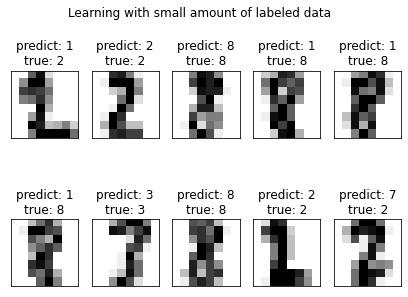

In [24]:
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

# <font color='red'> 4. Gaussian Distribution
## 4.1 Gaussian Mixture Model

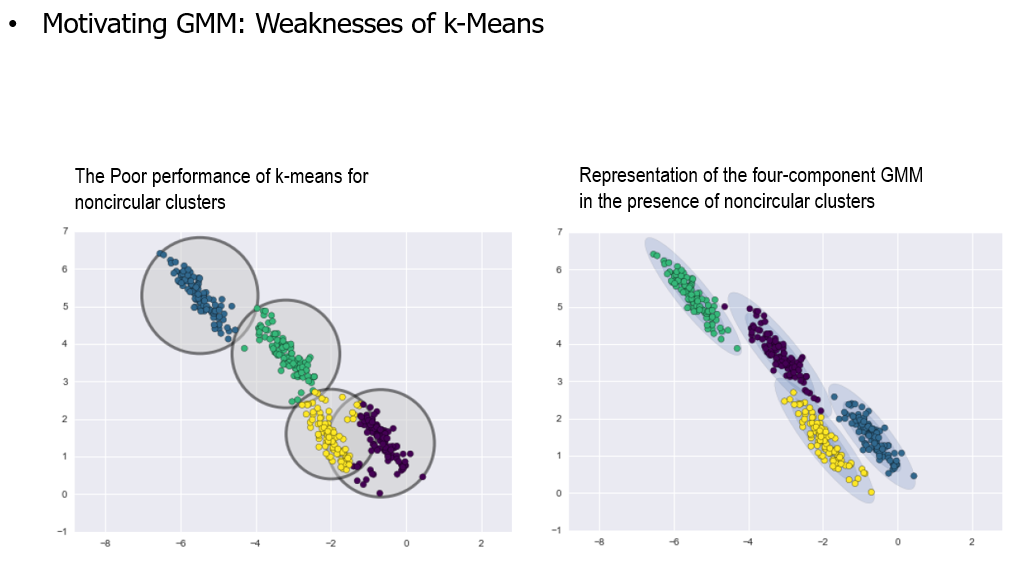

In [25]:
Image('../img/gmm.png', width=width, height=height)

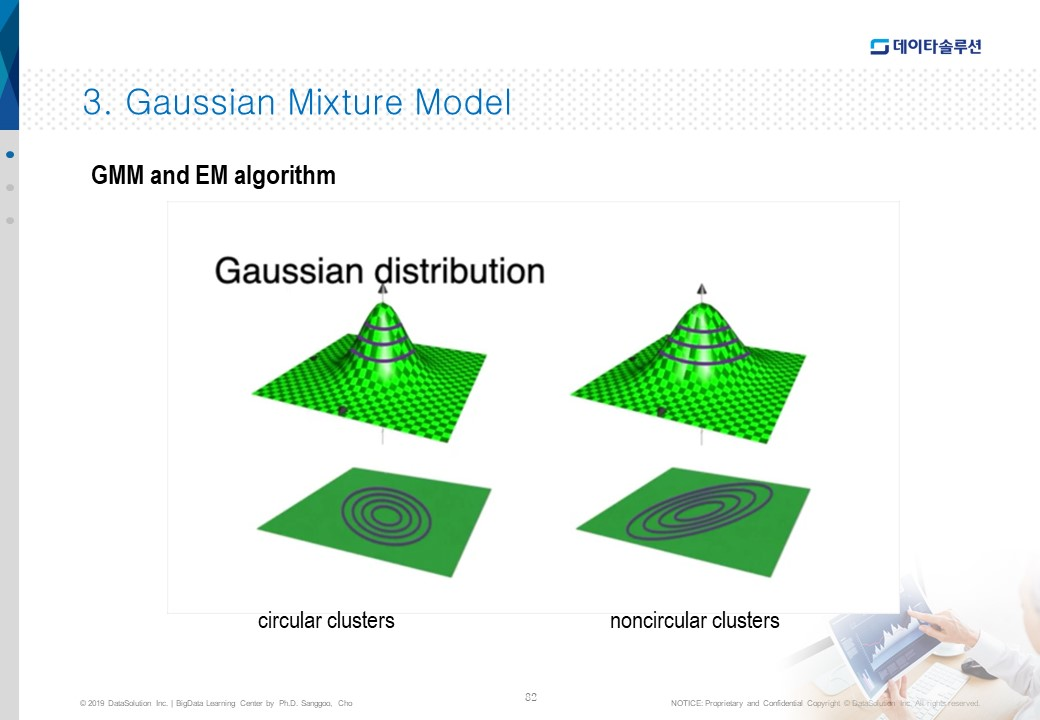

In [26]:
Image('../img/슬라이드82.jpg', width=width, height=height)

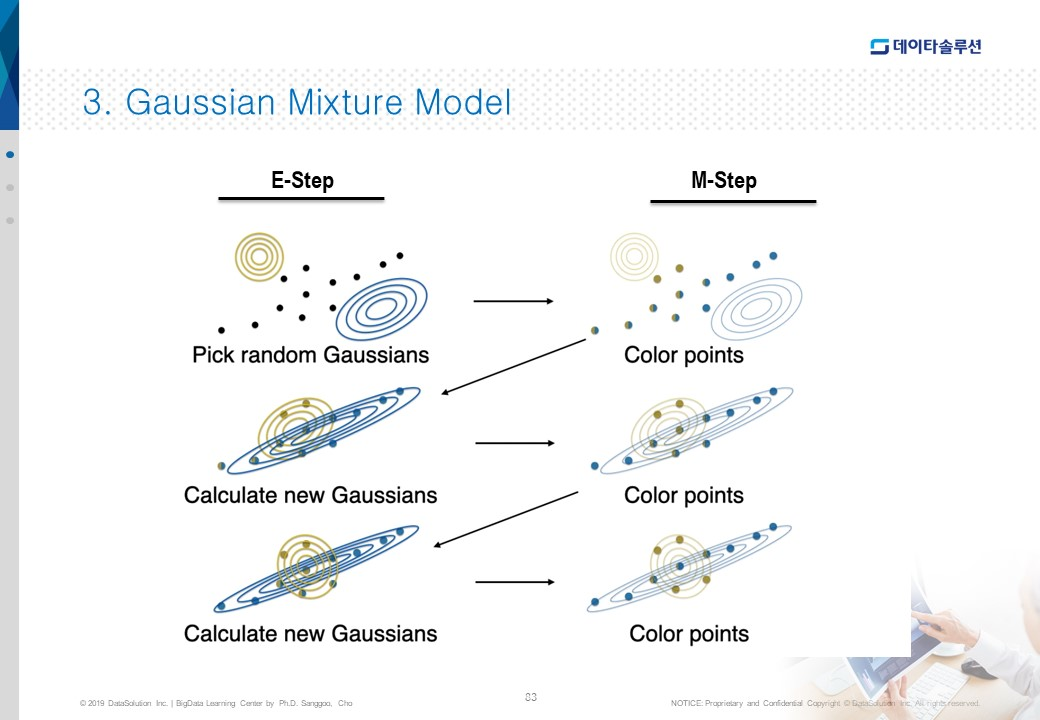

In [27]:
Image('../img/슬라이드83.jpg', width=width, height=height)

## 4.2 Anomaly Detection using Gaussian Distribution

- sklearn의 EllipticEnvelope API를 이용한 이상치 예측(An object for detecting outliers in a Gaussian distributed dataset)
- 모든 변수가 가우시안분포를 한다는 가정

두 독립변수의 분포는 정규분포이고 y의 클래스에 따라 모수가 달라진다.
negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 

첫번째 모집단 평균과 :
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}

공분산은
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}

array([[-1.87099378, -0.7612922 ],
       [-2.23119126, -1.7818422 ],
       [-3.39960191, -3.65866316],
       [-3.5981157 , -3.55124282],
       [-2.57469024, -4.39055424]])

array([[ 2.55144711,  1.94680218],
       [ 1.58026542,  3.91582847],
       [ 3.08895146,  1.53413986],
       [ 3.5732754 , -0.95220882],
       [ 2.50021539,  3.47271258]])

Text(0.5, 1.0, '데이터의 확률분포')

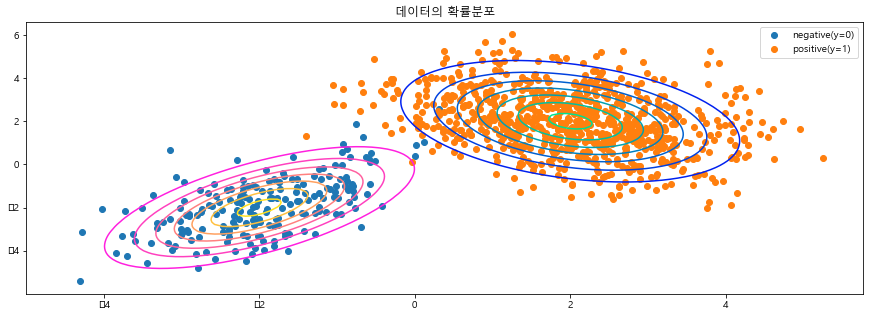

In [28]:
np.random.seed(13)
plt.rcParams['font.family']='Malgun Gothic'

rv0 = stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv0.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()
x0[0:5]
x1[0:5]

#X = np.vstack([x0, x1]); y = np.hstack([np.zeros(1000), np.ones(5000)])

xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(15,5))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("데이터의 확률분포")

plt.show()

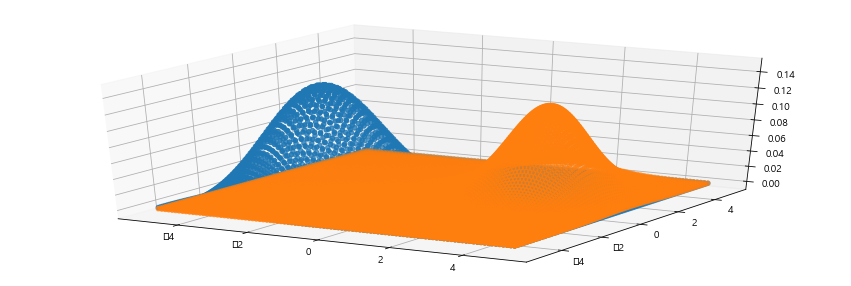

In [29]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection='3d')
ax.scatter3D(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])))
ax.scatter3D(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])))

In [30]:
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
X[:10]

array([[-1.61673103, -0.64316019],
       [-1.36314858,  0.51416492],
       [-1.38812887, -1.28529507],
       [-0.78603416, -0.50467625],
       [-0.0056125 ,  0.22487922],
       [-0.46025371,  0.5608042 ],
       [-0.6857151 , -0.29945373],
       [-0.4605907 , -0.06131079],
       [-1.24368003, -0.77946057],
       [-0.073319  , -0.51326387]])

In [31]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(X)

In [32]:
df = pd.DataFrame(X, columns = ('x1', 'x2'))
df['prediction'] = cov.predict(X)
df

,x1,x2,prediction
0,-1.616731,-0.643160,1
1,-1.363149,0.514165,-1
2,-1.388129,-1.285295,-1
3,-0.786034,-0.504676,1
4,-0.005612,0.224879,1
...,...,...,...
495,-0.422384,-0.126823,1
496,0.635193,0.473583,1
497,-0.345162,0.044419,1
498,0.149690,0.132389,1


### 새로운 변수를 예측하여 outliersms '-1' inlier는 '1'을 return

In [33]:
cov.predict([[0, 0],
             [3, 3]])

array([ 1, -1])

In [34]:
print('x1과 x2의 공분산은')
cov.covariance_

x1과 x2의 공분산은


array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

# 4.3 GMM for Generating New Data

GMM은 generative model로 새로운 데이터를 생성

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

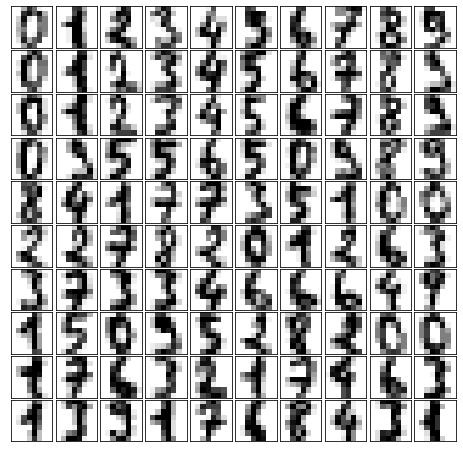

In [36]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
        
plot_digits(digits.data)

- 1,800 digits, 64개의 변수
- GMM은 고차원 데이터에는 약하기 때문에 원래 데이터 총변동량의 99%를 포함하는 PCA를 추출(feature extraction)하면 41개의 주성분

In [37]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape
data

(1797, 41)

array([[-0.09413512,  1.66272073, -0.79471413, ...,  0.66612268,
         0.12921503,  1.12810138],
       [ 0.59476828, -1.6231603 ,  0.37283291, ..., -0.14121984,
         0.4530931 , -1.02741397],
       [ 0.52259074, -0.77810179,  0.24846184, ...,  0.67821594,
         2.06061526,  0.95968578],
       ...,
       [ 0.80731022, -0.54397269,  0.47025462, ...,  0.22988403,
        -0.61584769,  0.3440185 ],
       [-0.36415081,  0.97098371, -0.85415667, ..., -0.48294165,
         0.37010906, -0.47004437],
       [-0.02574039,  0.49749417,  0.90478379, ..., -0.61384807,
         3.06337526, -0.20831763]])

### 군집의 개수 결정은 어떤 지표로 결정하나?

- GMM이 생성 모델이라는 사실은 주어진 데이터 세트에 대한 최적의 구성 요소 수를 결정하는 자연스러운 방법을 제공하게 됨
- 생성 모델은 본질적으로 데이터 세트에 대한 확률 분포이므로 교차 검증을 사용하여 과적합을 방지하여 특정 모델의 가정을 전제로 한 데이터의 *가능성(likelihood)*을 간단히 평가할 수 있음
- 과적합을 수정하는 또 다른 방법은 Akaike information criterion (AIC), Bayesian_information_criterion)을 사용
  * Scikit-Learn은 두 가지를 모두 계산
- Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

### BIC = log(m)p − 2 log(L^)
### AIC = 2p − 2 log(L)
- m is the number of instances, as always.
- p is the number of parameters learned by the model.
- L is the maximized value of the likelihood function of the model.

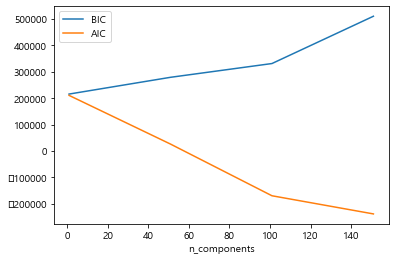

In [38]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 201, 50)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### <font color='green'> 최적의 클러스터 개 수는 AIC 또는 BIC를 최소화하는 값
- AIC와 BIC를 모두 고려하여 100개를 선택(BIC는 더 간단한 모델을 권장)
   *  <font color='red'> (주의사항) AIC/BIC는 GMM이 *클러스터링 알고리즘*으로 얼마나 잘 작동하는지가 아니라 *밀도 추정기*로서 얼마나 잘 작동하는지 측정

In [39]:
gmm = GaussianMixture(100, covariance_type='full', random_state=0)
gmm.fit(data)

GaussianMixture(n_components=100, random_state=0)

In [40]:
gmm.sample() # sample과 components(100개)를 생성

(array([[-0.80015045,  1.2174752 ,  0.27842851,  0.30931911,  1.60744521,
          0.53397382, -0.82449621,  0.79865359,  0.69163334,  0.14171928,
         -0.25643558,  0.61769671,  0.85267111,  0.26489613, -1.06107416,
         -1.4445008 ,  0.27508738,  0.61402919, -0.48255153, -0.11423845,
          0.79067684, -2.10382576,  0.7211197 ,  1.06585383, -1.06816652,
          0.03967776,  0.32313078, -0.61202942,  0.89325649,  0.11341451,
         -1.35051415,  0.31987946,  1.08960543, -0.79938141,  0.31699304,
         -1.13478479,  0.87247873, -1.19336112, -1.32761715,  0.14528904,
          0.50852309]]), array([52]))

In [41]:
data_new = gmm.sample(100)
type(data_new)
pd.DataFrame(data_new[0]).round(2)

tuple

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.67,-0.16,-0.85,-2.30,0.04,-0.45,-0.51,0.42,-0.83,1.59,...,1.70,1.24,0.15,-1.83,-1.25,-0.79,0.24,2.03,-1.23,-1.47
1,-0.72,-0.80,2.63,-0.10,0.16,-0.50,1.05,0.93,-0.10,-0.21,...,-0.19,-0.47,-0.44,-0.77,0.40,-0.61,0.99,0.24,-1.06,-1.36
2,-0.50,-0.40,1.54,0.19,-0.28,-0.32,1.06,-0.62,0.51,0.27,...,0.50,1.15,-0.93,0.54,0.35,-0.90,1.65,-0.97,0.03,-2.02
3,1.26,0.49,0.97,-0.53,0.21,1.08,-0.30,-0.34,-0.98,-0.37,...,0.78,0.32,0.14,-0.58,0.61,-0.19,0.14,-1.55,-0.34,0.41
4,1.16,1.29,1.45,0.51,-0.23,2.11,0.15,-1.36,-0.57,0.02,...,0.05,0.47,0.47,1.34,0.09,-0.23,0.26,-0.52,-0.42,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.29,1.18,1.38,-0.06,0.39,1.58,-0.96,-0.56,-0.05,-0.66,...,-0.86,0.25,0.35,0.47,-0.67,-0.30,-0.40,-0.38,0.23,-0.71
96,0.91,1.25,1.03,-0.01,0.06,2.01,-0.81,-0.09,-0.01,0.17,...,-1.32,-1.17,0.22,0.04,0.08,-1.36,0.03,0.89,-1.55,-1.57
97,-0.45,-0.81,1.24,-0.09,-0.47,-0.55,-1.76,2.78,1.08,0.40,...,-1.84,1.57,-0.47,1.50,1.88,-2.27,-2.23,0.71,-1.83,0.98
98,-0.04,-0.71,0.32,0.39,-0.82,0.23,-1.47,1.47,0.79,1.36,...,0.25,-2.94,-0.54,-0.07,2.30,-0.51,-2.42,0.17,0.52,0.32


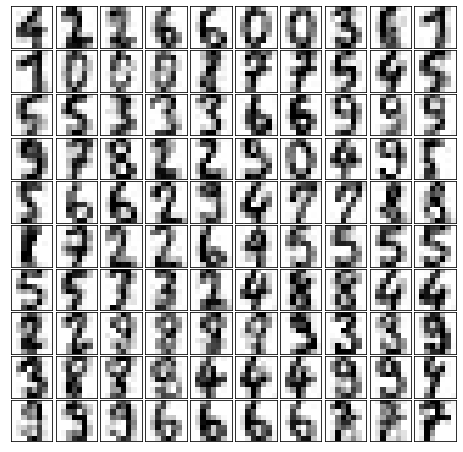

In [43]:
digits_new = pca.inverse_transform(np.asarray(data_new[0]))
plot_digits(digits_new)

# End